In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
df = df400= pd.read_csv('../lung_pollution/data/df400.csv', error_bad_lines=False,decimal=',',  delimiter=';')

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




In [193]:

X = df[['NO2_totMean', 'NO_totMean', 'O3_totMean','PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
y = df[['cases_per_100k']]


In [194]:
X_train = df[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax','PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
X_test_poll = df[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax', 'PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
X_test_vaxx = df[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax', 'PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
y_train = df[['cases_per_100k']]
print(X_train.shape)
print(X_test_poll.shape)
print(X_test_vaxx.shape)
print(y_train.shape)


(4000, 6)
(4000, 6)
(4000, 6)
(4000, 1)


In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Robust Scaler

scaler.fit(X_train)  # Fit scaler to feature
scaled_num = scaler.transform(X_train)  #Scale
X_train = pd.DataFrame(scaled_num, columns = X_train.columns)

In [196]:
X_test_poll['PM2_5_totMean'] = 5
X_test_poll['NO2_totMean'] = 10
X_test_poll['O3_daily8HrMax'] = 100
X_test_vaxx['fully_vaccinated'] = 1
scaled_test_poll = scaler.transform(X_test_poll)
scaled_test_vaxx = scaler.transform(X_test_vaxx)

/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/2203735490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/2203735490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/2203735490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [197]:
from sklearn.ensemble import  RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=201)

forest.fit(X_train,y_train)

print('R2 RandomForest: ', forest.score(X_train,y_train))

/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/1206131868.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R2 RandomForest:  0.9999104363477186


# make graph

In [198]:
y_pred_poll = forest.predict(scaled_test_poll)
y_pred_vaxx = forest.predict(scaled_test_vaxx)

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [199]:
# now we want to create a df to plot kde

In [200]:
# we want to plot y_train and y_pred_vaxx
#we also want to plot y_train and y_pred_poll

In [201]:
#we need to create a df where y_pred and 

In [202]:

dfk= y_train.copy()

In [203]:
dfk['y_pred_poll'] = y_pred_poll
dfk['y_pred_vaxx'] = y_pred_vaxx

In [204]:
dfk

,cases_per_100k,y_pred_poll,y_pred_vaxx
0,6640.688066,5961.624317,6400.462576
1,6640.688066,5961.624317,6400.462576
2,6640.688066,5961.624317,6398.889434
3,6640.688066,5961.624317,6420.729468
4,6640.688066,5961.624317,6401.848030
...,...,...,...
3995,6090.569875,5844.860127,6060.387843
3996,6090.569875,5844.860127,6060.680724
3997,6090.569875,5844.860127,6060.680724
3998,6090.569875,5844.860127,6060.680724


In [278]:
dfk

,cases_per_100k,y_pred_poll,y_pred_vaxx
0,6640.688066,5961.624317,6400.462576
1,6640.688066,5961.624317,6400.462576
2,6640.688066,5961.624317,6398.889434
3,6640.688066,5961.624317,6420.729468
4,6640.688066,5961.624317,6401.848030
...,...,...,...
3995,6090.569875,5844.860127,6060.387843
3996,6090.569875,5844.860127,6060.680724
3997,6090.569875,5844.860127,6060.680724
3998,6090.569875,5844.860127,6060.680724


/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_85547/1120097291.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.


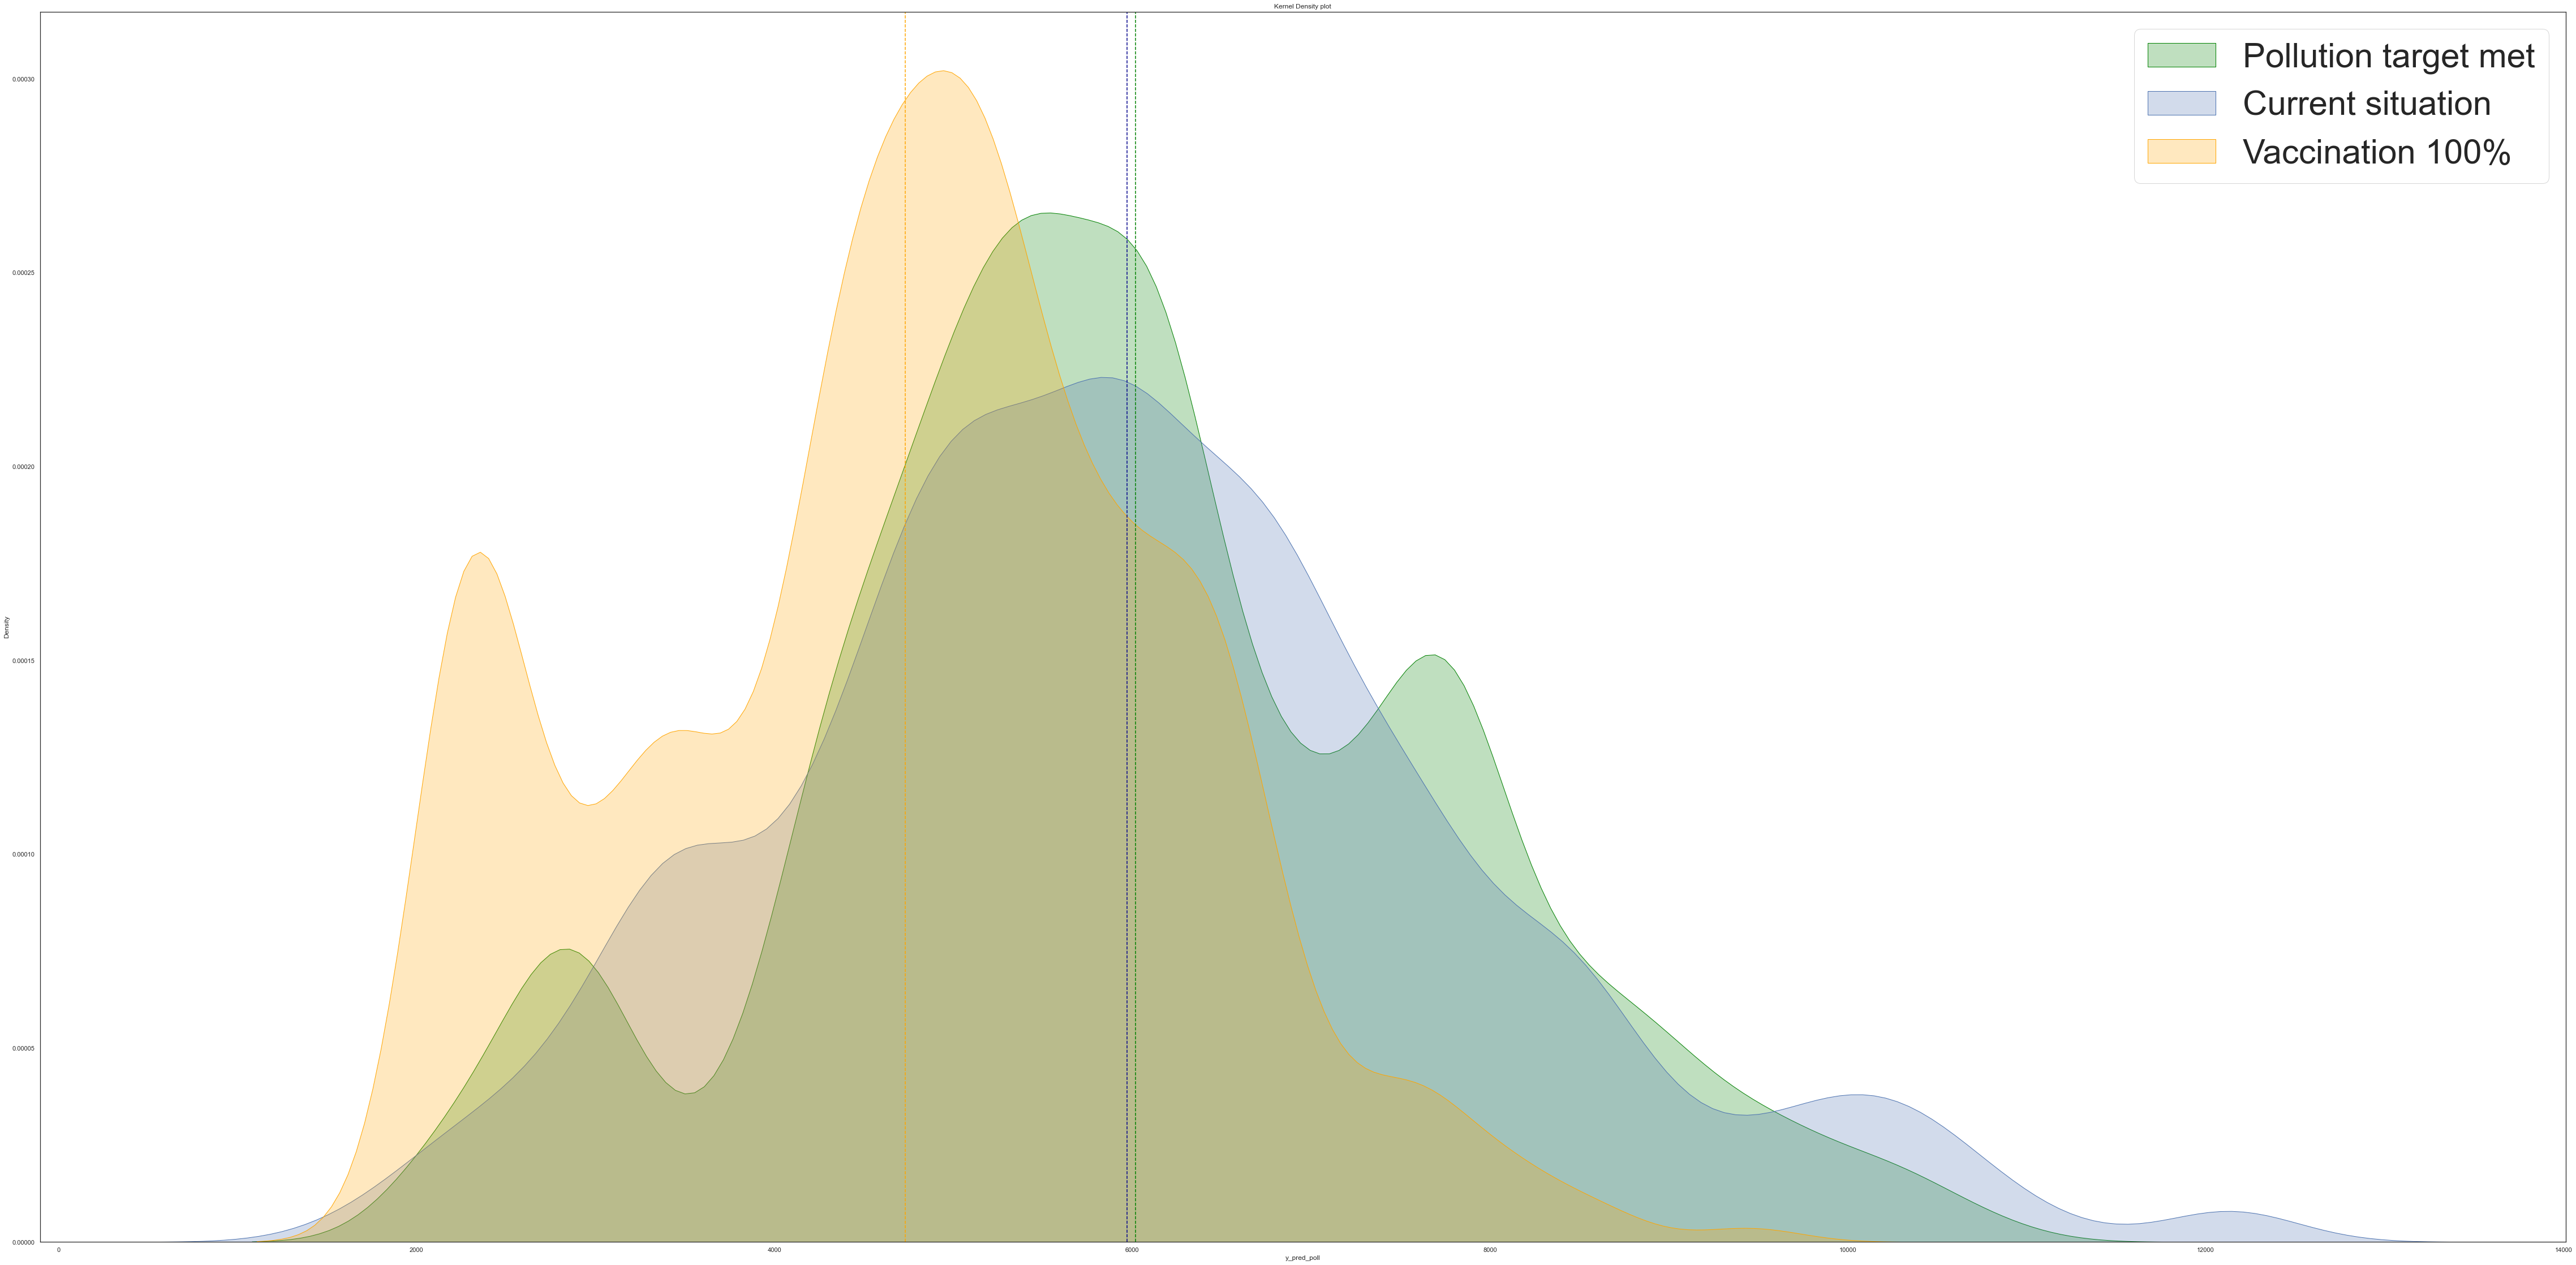

In [281]:
sns.set(style="white")
plt.figure(figsize=(80,40)) #limitare x axis
plt.gca(title='Kernel Density plot')

plt.legend(labels=['current situation','Pollution target met','Vaccination 100%'],loc=1)


sns.kdeplot(data=dfk, x='y_pred_poll' ,fill=True,  label='Pollution target met', shade_lowest=False,color='green')
sns.kdeplot(data=dfk, x='cases_per_100k',fill=True, label='Current situation') #blue
plt.axvline(x=dfk['cases_per_100k'].mean(),
            color='green',ls='--')
sns.kdeplot(data=dfk, x='y_pred_vaxx',fill=True, label='Vaccination 100%',color='orange')
plt.axvline(x=dfk['y_pred_vaxx'].mean(),
            color='orange',ls='--')

plt.axvline(x=dfk['y_pred_poll'].mean(),
            color='darkblue',ls='--')#orange 
plt.legend(fontsize='60')

SyntaxError: invalid syntax (189108723.py, line 2)

GridSpec(3, 2, width_ratios=[2, 1])

<Figure size 576x432 with 0 Axes>